In [1]:
from seirsplus.models import *
from seirsplus.networks import *
import networkx as nx
import random
import matplotlib.pyplot as plt

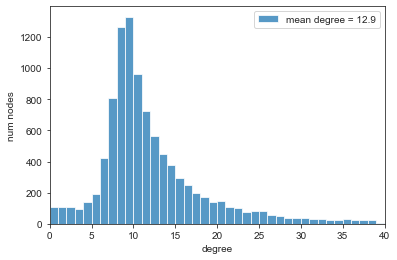

In [2]:
numNodes = 10000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=9)
# Baseline normal interactions:
G_normal     = custom_exponential_graph(baseGraph, scale=100)
plot_degree_distn(G_normal, max_degree=40)

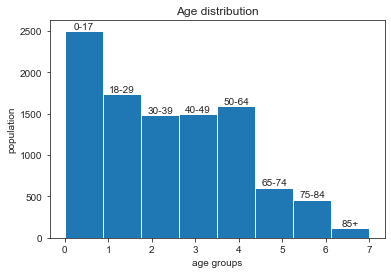

In [3]:
ages = []
mortalities = []
for node in G_normal.nodes():
    age = random.random()
    if age<=0.25:
        mortality = 0.0001
        agegroup = 0
    elif age>0.25 and age<=0.425:
        mortality = 0.001
        agegroup = 1
    elif age>0.425 and age<=0.577:
        mortality = 0.0045
        agegroup = 2
    elif age>0.577 and age<=0.724:
        mortality = 0.013
        agegroup = 3
    elif age>0.724 and age<=0.88:
        mortality = 0.044
        agegroup = 4
    elif age>0.88 and age<=0.945:
        mortality = 0.13
        agegroup = 5
    elif age>0.945 and age<=0.989:
        mortality = 0.32
        agegroup = 6
    else:
        mortality = 0.87
        agegroup = 7
    ages.append(agegroup)
    mortalities.append(mortality)
    
nx.set_node_attributes(G_normal, ages, "age")
nx.set_node_attributes(G_normal, mortalities, "mortality")

fig, ax = plt.subplots(1, 1)
ax.hist(ages,bins=8)
ax.set_title('Age distribution')
ax.set_xlabel('age groups')
ax.set_ylabel('population')
rects = ax.patches
labels = ["0-17", "18-29", "30-39", "40-49", "50-64", "65-74", "75-84", "85+"]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')

plt.show()

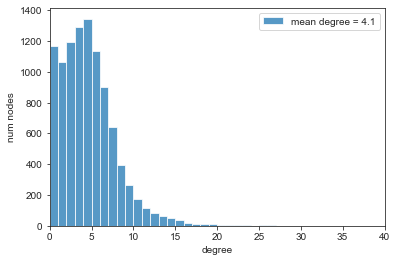

In [4]:
# Social distancing interactions:
G_distancing = custom_exponential_graph(baseGraph, scale=10)
plot_degree_distn(G_distancing, max_degree=40)

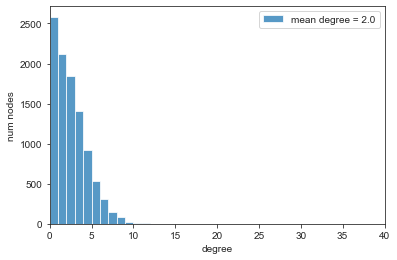

In [5]:
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)
plot_degree_distn(G_quarantine, max_degree=40)

### Initializing the model parameters
All model parameter values, including the normal and quarantine interaction networks, are set in the call to the ```SEIRSNetworkModel``` constructor. The normal interaction network ```G``` and the basic SEIR parameters ```beta```, ```sigma```, and ```gamma``` are the only required arguments. All other arguments represent parameters for optional extended model dynamics; these optional parameters take default values that turn off their corresponding dynamics when not provided in the constructor. For clarity and ease of customization in this notebook, all available model parameters are listed below. 


In [6]:
SIGMA  = 1/5.2
GAMMA  = 1/10
MU_I   = 0.002

R0     = 2.5
BETA   = 1/(1/GAMMA) * R0
BETA_Q = 0.5*BETA

P      = 0.2
Q      = 0.05

In [26]:
model = SEIRSNetworkModel(G       = G_normal, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          mu_I    = MU_I,
                          mu_0    = 0, 
                          nu      = 0, 
                          xi      = 0,
                          p       = P,
                          G_Q     = G_quarantine, 
                          beta_Q  = BETA_Q, 
                          sigma_Q = SIGMA,
                          gamma_Q = GAMMA, 
                          mu_Q    = MU_I,
                          theta_E = 0, 
                          theta_I = 0, 
                          phi_E   = 0, 
                          phi_I   = 0, 
                          psi_E   = 1.0, 
                          psi_I   = 1.0,
                          q       = Q,
                          initI   = numNodes/100, 
                          initE   = 0, 
                          initQ_E = 0, 
                          initQ_I = 0, 
                          initR   = 0, 
                          initF   = 0,
                          f = mortalities)

In [27]:
checkpoints = {'t':       [20, 100], 
               'G':       [G_distancing, G_normal], 
               'p':       [0.5*P, P], 
               'theta_E': [0.02, 0.02], 
               'theta_I': [0.02, 0.02], 
               'phi_E':   [0.2, 0.2], 
               'phi_I':   [0.2, 0.2]}

In [28]:
model.run(T=300, checkpoints=checkpoints, print_interval=10, verbose=True)

t = 0.01
	 S      = 9899.0
	 E      = 1.0
	 I  = 100.0
	 R      = 0.0
	 F      = 0.0
	 Q_E    = 0.0
	 Q_I  = 0.0
t = 10.02
	 S      = 9697.0
	 E      = 91.0
	 I  = 114.0
	 R      = 0.0
	 F      = 0.0
	 Q_E    = 0.0
	 Q_I  = 0.0
[Checkpoint: Updating parameters]
t = 20.01
	 S      = 9382.0
	 E      = 177.0
	 I  = 209.0
	 R      = 0.0
	 F      = 0.0
	 Q_E    = 0.0
	 Q_I  = 0.0
t = 30.00
	 S      = 9068.0
	 E      = 134.0
	 I  = 207.0
	 R      = 0.0
	 F      = 0.0
	 Q_E    = 19.0
	 Q_I  = 74.0
t = 40.00
	 S      = 8758.0
	 E      = 150.0
	 I  = 210.0
	 R      = 0.0
	 F      = 0.0
	 Q_E    = 16.0
	 Q_I  = 91.0
t = 50.00
	 S      = 8410.0
	 E      = 144.0
	 I  = 242.0
	 R      = 0.0
	 F      = 1.0
	 Q_E    = 25.0
	 Q_I  = 102.0
t = 60.00
	 S      = 8074.0
	 E      = 139.0
	 I  = 221.0
	 R      = 0.0
	 F      = 1.0
	 Q_E    = 35.0
	 Q_I  = 120.0
t = 70.00
	 S      = 7804.0
	 E      = 104.0
	 I  = 190.0
	 R      = 0.0
	 F      = 5.0
	 Q_E    = 31.0
	 Q_I  = 163.0
t = 80.01
	 S      = 7527.0
	

True

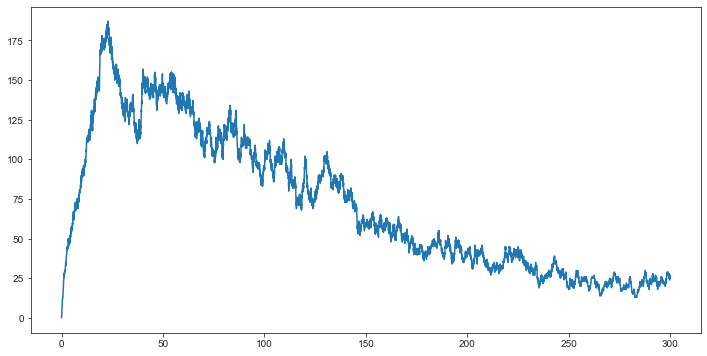

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(model.tseries, model.numE)

## without age

In [30]:
G_normal_2     = custom_exponential_graph(baseGraph, scale=100)

In [31]:
model2 = SEIRSNetworkModel(G      = G_normal_2, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          mu_I    = MU_I,
                          mu_0    = 0, 
                          nu      = 0, 
                          xi      = 0,
                          p       = P,
                          G_Q     = G_quarantine, 
                          beta_Q  = BETA_Q, 
                          sigma_Q = SIGMA,
                          gamma_Q = GAMMA, 
                          mu_Q    = MU_I,
                          theta_E = 0, 
                          theta_I = 0, 
                          phi_E   = 0, 
                          phi_I   = 0, 
                          psi_E   = 1.0, 
                          psi_I   = 1.0,
                          q       = Q,
                          initI   = numNodes/100, 
                          initE   = 0, 
                          initQ_E = 0, 
                          initQ_I = 0, 
                          initR   = 0, 
                          initF   = 0)

In [32]:
checkpoints = {'t':       [20, 100], 
               'G':       [G_distancing, G_normal_2], 
               'p':       [0.5*P, P], 
               'theta_E': [0.02, 0.02], 
               'theta_I': [0.02, 0.02], 
               'phi_E':   [0.2, 0.2], 
               'phi_I':   [0.2, 0.2]}

In [33]:
model2.run(T=300, checkpoints = checkpoints)

t = 0.01
t = 10.03
[Checkpoint: Updating parameters]
t = 20.00
t = 30.01
t = 40.01
t = 50.01
t = 60.01
t = 70.01
t = 80.00
t = 90.01
[Checkpoint: Updating parameters]
t = 100.01
t = 110.00
t = 120.03
t = 130.01
t = 140.00
t = 150.05
t = 160.01
t = 170.00
t = 180.01
t = 190.01
t = 200.01
t = 210.02
t = 220.02
t = 230.02
t = 240.04
t = 250.06
t = 260.01
t = 270.02
t = 280.03
t = 290.01
t = 300.03


True

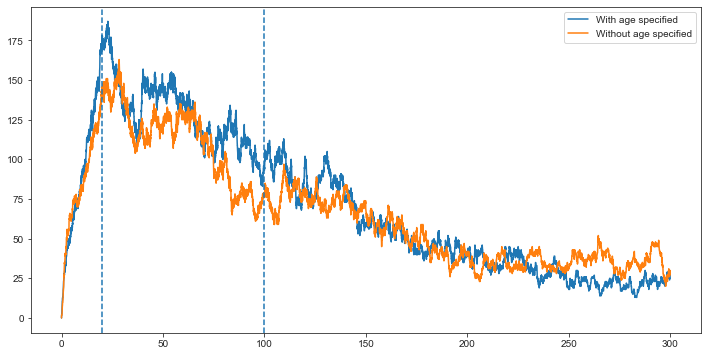

In [39]:
plt.figure(figsize=(12,6))
plt.plot(model.tseries, model.numE, label = "With age specified")
plt.plot(model2.tseries, model2.numE, label = "Without age specified")
plt.axvline(x = 20, linestyle = '--')
plt.axvline(x = 100, linestyle = '--')
plt.legend()

### Visualizing the results

C:\ProgramData\Anaconda\lib\site-packages\seirsplus\models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


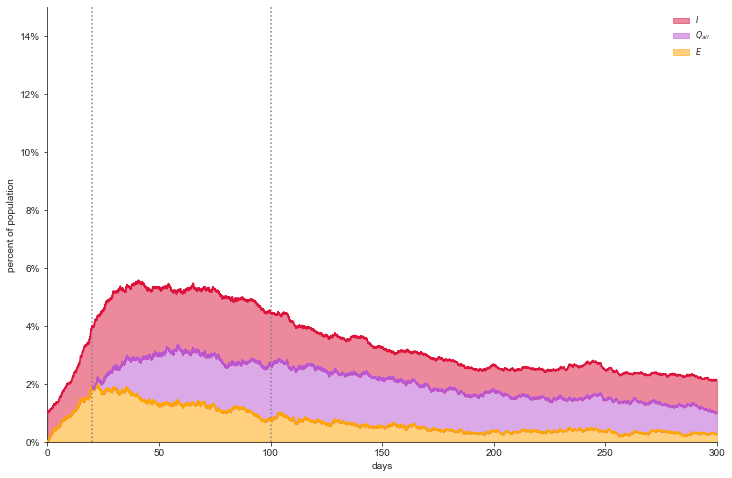

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='days', ylabel='percent of population'>)

In [11]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.15)

C:\ProgramData\Anaconda\lib\site-packages\seirsplus\models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


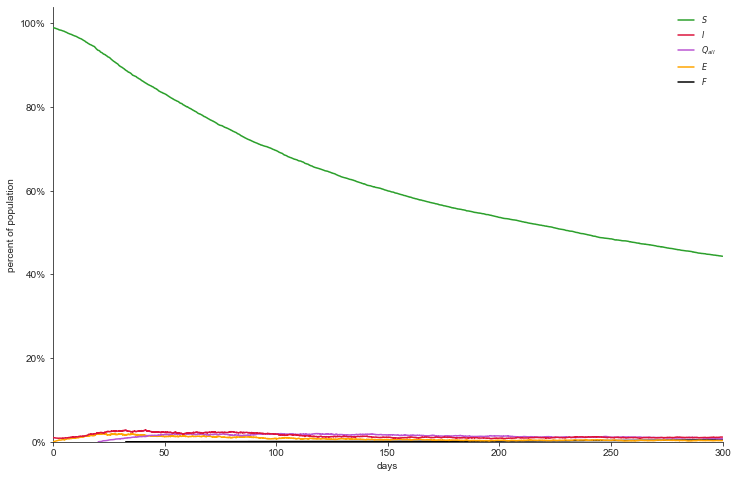

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='days', ylabel='percent of population'>)

In [12]:
model.figure_basic()


#### Reference simulation visualizations

We can also visualize the results of other simulation(s) as a reference for comparison of our main simulation.

Here we simulate a model where no distancing or testing takes place, so that we can compare the effects of these interventions:

In [13]:
ref_model = SEIRSNetworkModel(G=G_normal, beta=BETA, sigma=SIGMA, gamma=GAMMA, mu_I=MU_I, p=P,
                              G_Q=G_quarantine, beta_Q=BETA_Q, sigma_Q=SIGMA, gamma_Q=GAMMA, mu_Q=MU_I,
                              theta_E=0, theta_I=0, phi_E=0, phi_I=0, psi_E=1.0, psi_I=1.0, q=Q,
                              initI=numNodes/100)
ref_model.run(T=300)

t = 0.01
t = 10.01
t = 20.00
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.00
t = 110.02
t = 120.10
t = 130.01
t = 140.06
t = 150.34
t = 160.15
t = 170.85


True

C:\ProgramData\Anaconda\lib\site-packages\seirsplus\models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


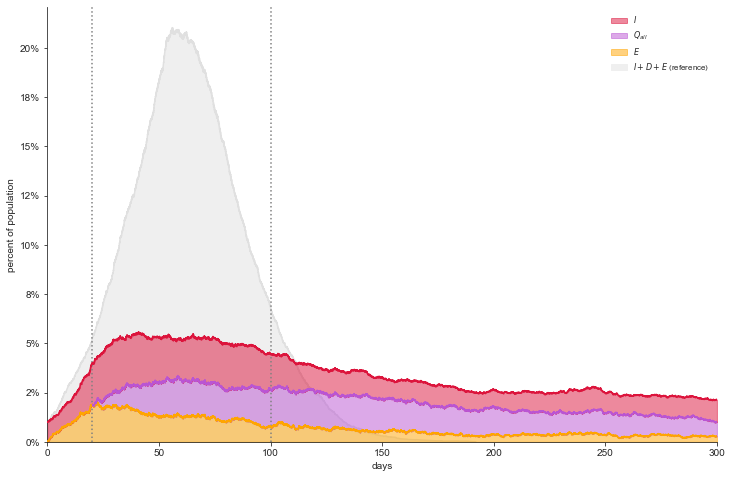

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='days', ylabel='percent of population'>)

In [14]:
model.figure_infections(vlines=checkpoints['t'], shaded_reference_results=ref_model)

In [15]:
ref_model_determ = SEIRSModel(beta=BETA, sigma=SIGMA, gamma=GAMMA, mu_I=MU_I, initI=100, initN=10000) 
ref_model_determ.run(T=300)

t = 299.90


True

C:\ProgramData\Anaconda\lib\site-packages\seirsplus\models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


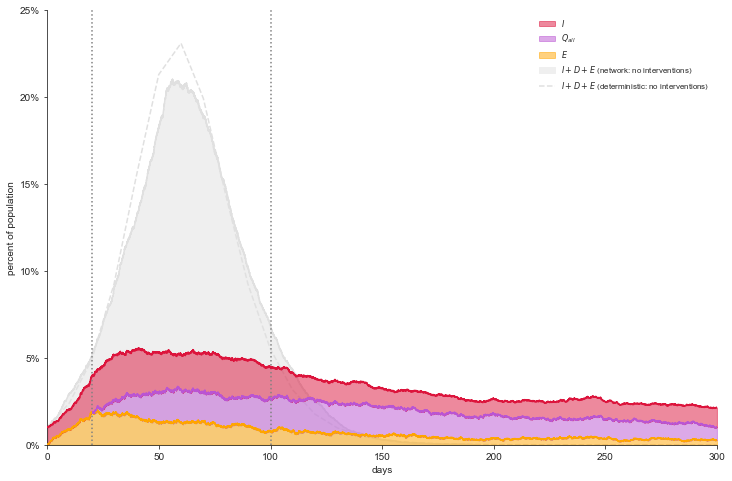

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='days', ylabel='percent of population'>)

In [16]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.25, 
                        shaded_reference_results=ref_model, shaded_reference_label='network: no interventions',
                        dashed_reference_results=ref_model_determ, dashed_reference_label='deterministic: no interventions')